## Visualizacion de datos con seaborn

Seteo del notebook

In [83]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Completo")

Setup Complete


<span style="color: cyan; font-size: 14px">
    Carga del dataset
</span>

In [175]:
df = pd.read_excel(
    "/home/studio-lab-user/Swimming Data Analysis/Data/Clean_data/clean_data.xlsx",
    index_col="Fecha",
    parse_dates=True
    )

<span style="color: cyan; font-size: 14px">
    Informacion sobre el dataset
</span>

In [176]:
print('Columnas ', df.columns)
print('Index ', df.index)
print('Dimensiones ', df.shape)
print('Info ', df.info())

Columnas  Index(['Hora_inicio', 'Hora_de_finalización', 'Duración_sesion',
       'Tipo_entrenamiento', 'Objetivos', 'Metas', 'Metros_piscina',
       'Metros_totales', 'Cantidad_de_brazadas', 'Frecuencia_cardíaca',
       'Calorías_quemadas', 'Tiempo_estilo_espalda', 'Metros_estilo_espalda',
       'Repeticiones_estilo_espalda', 'Tiempo_estilo_pecho',
       'Metros_estilo_pecho', 'Repeticiones_estilo_pecho',
       'Tiempo_estilo_crawl', 'Metros_estilo_crawl',
       'Repeticiones_estilo_crawl', 'Descanso_entre_series', 'Ritmo_promedio',
       'Vueltas', 'Tiempo_ingesta_previa', 'Ingesta_descripcion',
       'Suplemento_dietario', 'Ejercicios_previos',
       'Tiempo_ejercicios_previos', 'Sensaciones_entrenamiento'],
      dtype='object')
Index  DatetimeIndex(['2023-02-01', '2023-01-30', '2023-01-27', '2023-01-25',
               '2023-01-23', '2023-01-20', '2023-01-18', '2023-01-16',
               '2023-01-14'],
              dtype='datetime64[ns]', name='Fecha', freq=None)
Dimens

<span style="color: cyan; font-size: 14px">
    Extraccion de una muestra de datos del dataset
</span>

In [177]:
df.head(7)

,Hora_inicio,Hora_de_finalización,Duración_sesion,Tipo_entrenamiento,Objetivos,Metas,Metros_piscina,Metros_totales,Cantidad_de_brazadas,Frecuencia_cardíaca,...,Repeticiones_estilo_crawl,Descanso_entre_series,Ritmo_promedio,Vueltas,Tiempo_ingesta_previa,Ingesta_descripcion,Suplemento_dietario,Ejercicios_previos,Tiempo_ejercicios_previos,Sensaciones_entrenamiento
Fecha,,,,,,,,,,,,,,,,,,,,,
2023-02-01,09:00:00,10:15:50,01:15:50,Estilos,Mejorar Tecnica,Mejorar rendimiento,20,1920,1382,124,...,5.0,00:00:00,3.60,96,00:40:00,"Cafe, pan, clara huevo",Creatina,Caminata,00:00:10,Muy buenas
2023-01-30,09:05:00,10:05:00,01:01:11,Series,Mejorar Tecnica,Mejorar rendimiento,20,1420,980,120,...,4.0,00:00:30,4.20,71,01:00:00,"Leche con coco, pan",Creatina,Caminata,00:00:15,Muy buenas
2023-01-27,11:04:00,NaN,00:55:18,Estilos,Mejorar Tecnica,Mejorar crawl,20,1420,890,135,...,4.0,00:00:45,3.54,71,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Muy buenas
2023-01-25,08:50:00,09:50:00,01:01:11,Estilos,Mejorar Tecnica,Mejorar crawl,20,1340,818,131,...,3.0,00:01:00,4.34,67,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-23,21:06:00,NaN,00:37:45,Series,Mejorar Tecnica,Aumentar distancia,20,780,506,134,...,2.0,00:01:30,4.50,39,01:00:00,"Cafe, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-20,09:33:00,NaN,00:53:54,Series,Mejorar Tecnica,Incrementar velocidad,20,1100,663,137,...,2.0,00:01:30,4.54,55,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-18,09:50:00,NaN,00:54:21,Estilos,Resistencia,Incrementar velocidad,20,1220,832,137,...,2.0,00:01:30,4.27,61,01:00:00,"Cafe, panes",Creatina,Caminata,00:00:10,Buenas


In [5]:
df.Metas.value_counts()

Mejorar crawl            2
Incrementar velocidad    2
Mejorar rendimiento      1
Aumentar distancia       1
Name: Metas, dtype: int64

<span style="color: cyan; font-size: 14px">
    Limpieza de datos nulos
</span>

In [184]:
missing_values_count = df.isnull().sum()
missing_values_count[0:29]

Hora_inicio                    0
Hora_de_finalización           0
Duración_sesion                0
Tipo_entrenamiento             0
Objetivos                      0
Metas                          0
Metros_piscina                 0
Metros_totales                 0
Cantidad_de_brazadas           0
Frecuencia_cardíaca            0
Calorías_quemadas              0
Tiempo_estilo_espalda          0
Metros_estilo_espalda          0
Repeticiones_estilo_espalda    0
Tiempo_estilo_pecho            0
Metros_estilo_pecho            0
Repeticiones_estilo_pecho      0
Tiempo_estilo_crawl            0
Metros_estilo_crawl            0
Repeticiones_estilo_crawl      0
Descanso_entre_series          0
Ritmo_promedio                 0
Vueltas                        0
Tiempo_ingesta_previa          0
Ingesta_descripcion            0
Suplemento_dietario            0
Ejercicios_previos             0
Tiempo_ejercicios_previos      0
Sensaciones_entrenamiento      0
dtype: int64

In [179]:
df['Hora_de_finalización'].fillna(value='00:00:00', inplace=True)
df['Tiempo_estilo_espalda'].fillna(value='00:00:00', inplace=True)
df['Tiempo_estilo_pecho'].fillna(value='00:00:00', inplace=True)
df['Tiempo_estilo_crawl'].fillna(value='00:00:00', inplace=True)

In [180]:
mean = df['Metros_estilo_espalda'].mean()
df['Metros_estilo_espalda'].fillna(value=mean, inplace=True)

mean = df['Metros_estilo_pecho'].mean()
df['Metros_estilo_pecho'].fillna(value=mean, inplace=True)

mean = df['Metros_estilo_crawl'].mean()
df['Metros_estilo_crawl'].fillna(value=mean, inplace=True)

In [181]:
mean = df['Repeticiones_estilo_espalda'].mean()
df['Repeticiones_estilo_espalda'].fillna(value=mean, inplace=True)

mean = df['Repeticiones_estilo_pecho'].mean()
df['Repeticiones_estilo_pecho'].fillna(value=mean, inplace=True)

mean = df['Repeticiones_estilo_crawl'].mean()
df['Repeticiones_estilo_crawl'].fillna(value=mean, inplace=True)

In [182]:
df['Metas'].fillna(value='Unknow', inplace=True)

In [183]:
df.sample(5)

,Hora_inicio,Hora_de_finalización,Duración_sesion,Tipo_entrenamiento,Objetivos,Metas,Metros_piscina,Metros_totales,Cantidad_de_brazadas,Frecuencia_cardíaca,...,Repeticiones_estilo_crawl,Descanso_entre_series,Ritmo_promedio,Vueltas,Tiempo_ingesta_previa,Ingesta_descripcion,Suplemento_dietario,Ejercicios_previos,Tiempo_ejercicios_previos,Sensaciones_entrenamiento
Fecha,,,,,,,,,,,,,,,,,,,,,
2023-01-30,09:05:00,10:05:00,01:01:11,Series,Mejorar Tecnica,Mejorar rendimiento,20,1420,980,120,...,4.0,00:00:30,4.20,71,01:00:00,"Leche con coco, pan",Creatina,Caminata,00:00:15,Muy buenas
2023-01-16,21:04:00,00:00:00,00:33:56,Series,Mejorar Tecnica,Unknow,20,820,455,135,...,2.0,00:01:30,4.08,41,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-20,09:33:00,00:00:00,00:53:54,Series,Mejorar Tecnica,Incrementar velocidad,20,1100,663,137,...,2.0,00:01:30,4.54,55,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-14,17:13:00,00:00:00,00:43:00,Series,Prueba,Unknow,5,240,73,116,...,3.0,00:01:30,17.55,12,01:00:00,Banana,Creatina,Caminata,00:00:10,Piscina Pequeña
2023-02-01,09:00:00,10:15:50,01:15:50,Estilos,Mejorar Tecnica,Mejorar rendimiento,20,1920,1382,124,...,5.0,00:00:00,3.60,96,00:40:00,"Cafe, pan, clara huevo",Creatina,Caminata,00:00:10,Muy buenas


<span style="color: green; font-size: 24px">
    Group by
</span>

Operacion de agrupamiento por Metros ejecutados por estilo

In [185]:
metros_estilos = df.groupby(['Fecha', 'Duración_sesion', 'Tipo_entrenamiento', 'Metros_estilo_espalda', 'Metros_estilo_pecho', 'Metros_estilo_crawl', 'Sensaciones_entrenamiento']).Duración_sesion.agg([max])
metros_estilos

,,,,,,,max
Fecha,Duración_sesion,Tipo_entrenamiento,Metros_estilo_espalda,Metros_estilo_pecho,Metros_estilo_crawl,Sensaciones_entrenamiento,
2023-01-14,00:43:00,Series,390.0,367.5,431.428571,Piscina Pequeña,00:43:00
2023-01-16,00:33:56,Series,260.0,360.0,431.428571,Buenas,00:33:56
2023-01-18,00:54:21,Estilos,300.0,400.0,200.000000,Buenas,00:54:21
2023-01-20,00:53:54,Series,300.0,300.0,300.000000,Buenas,00:53:54
2023-01-23,00:37:45,Series,300.0,300.0,300.000000,Buenas,00:37:45
2023-01-25,01:01:11,Estilos,360.0,360.0,300.000000,Buenas,01:01:11
2023-01-27,00:55:18,Estilos,500.0,300.0,600.000000,Muy buenas,00:55:18
2023-01-30,01:01:11,Series,500.0,320.0,600.000000,Muy buenas,01:01:11
2023-02-01,01:15:50,Estilos,600.0,600.0,720.000000,Muy buenas,01:15:50


### Visualizacion del agrupamiento de datos previo

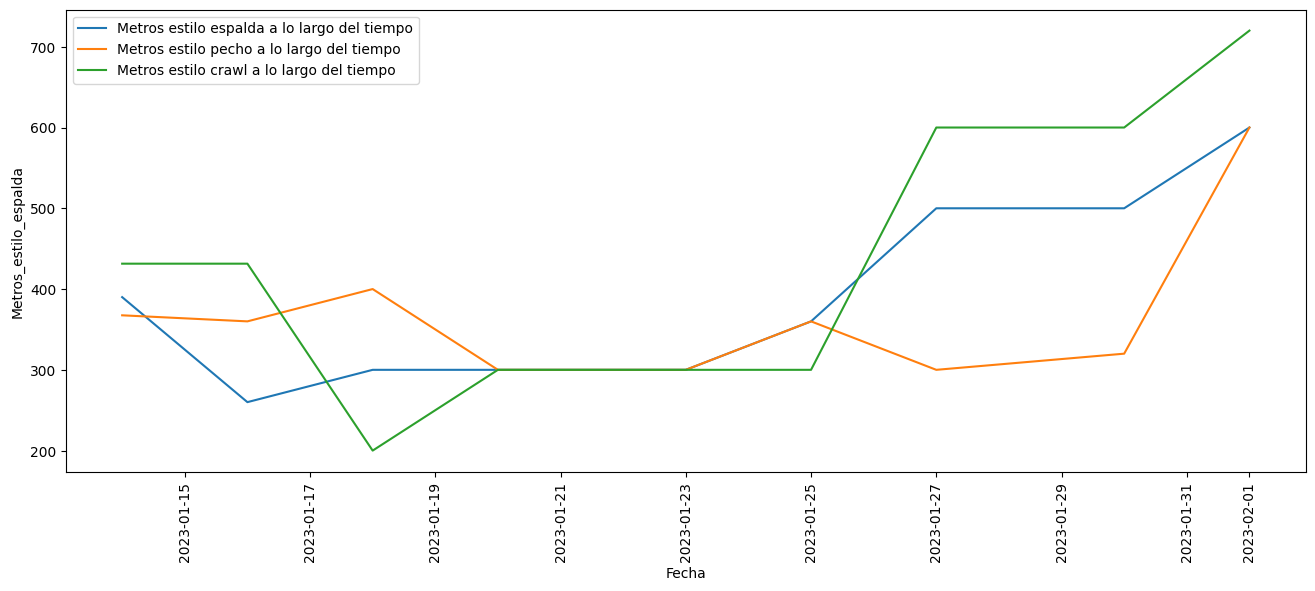

In [187]:
# Seteo del ancho y altura del grafico
plt.figure(figsize=(16,6))

# Metros estilo crawl a lo largo del tiempo
sns.lineplot(x="Fecha", y="Metros_estilo_espalda", data=metros_estilos, label="Metros estilo espalda a lo largo del tiempo")
sns.lineplot(x="Fecha", y="Metros_estilo_pecho", data=metros_estilos, label="Metros estilo pecho a lo largo del tiempo")
sns.lineplot(x="Fecha", y="Metros_estilo_crawl", data=metros_estilos, label="Metros estilo crawl a lo largo del tiempo")
plt.xticks(rotation=90)
plt.legend()

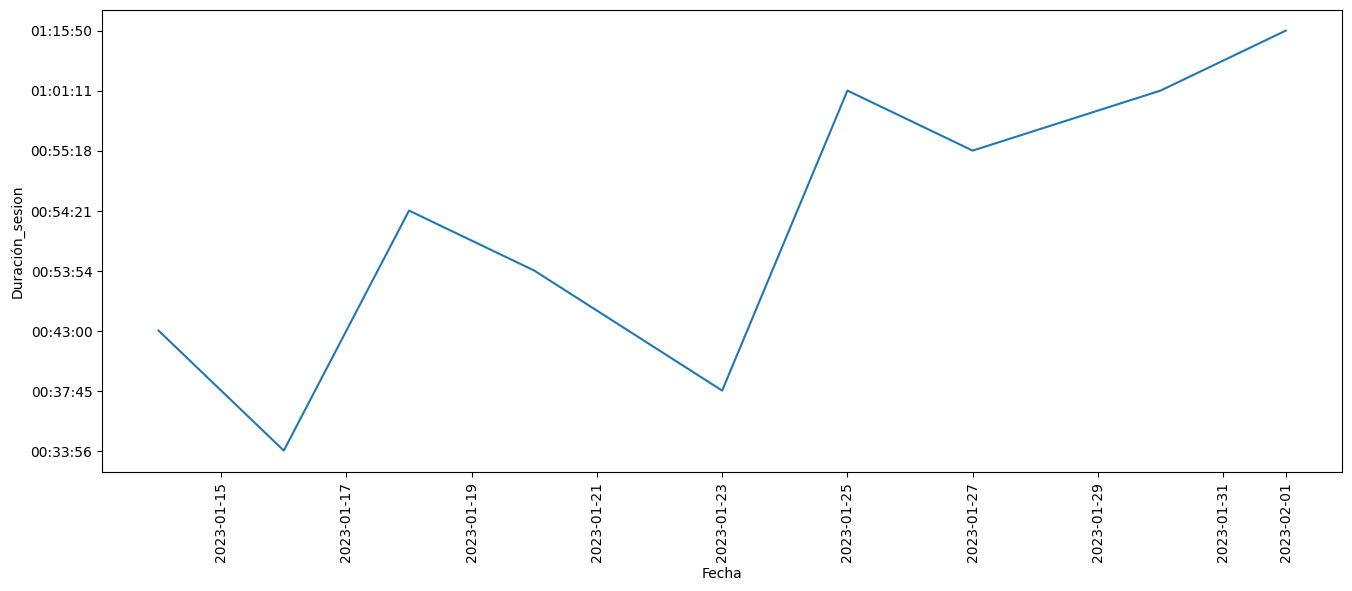

In [189]:
plt.figure(figsize=(16,6))

df = df.sort_values("Duración_sesion", ascending=False)
sns.lineplot(x="Fecha", y="Duración_sesion", data=df)
plt.xticks(rotation=90)
plt.show()

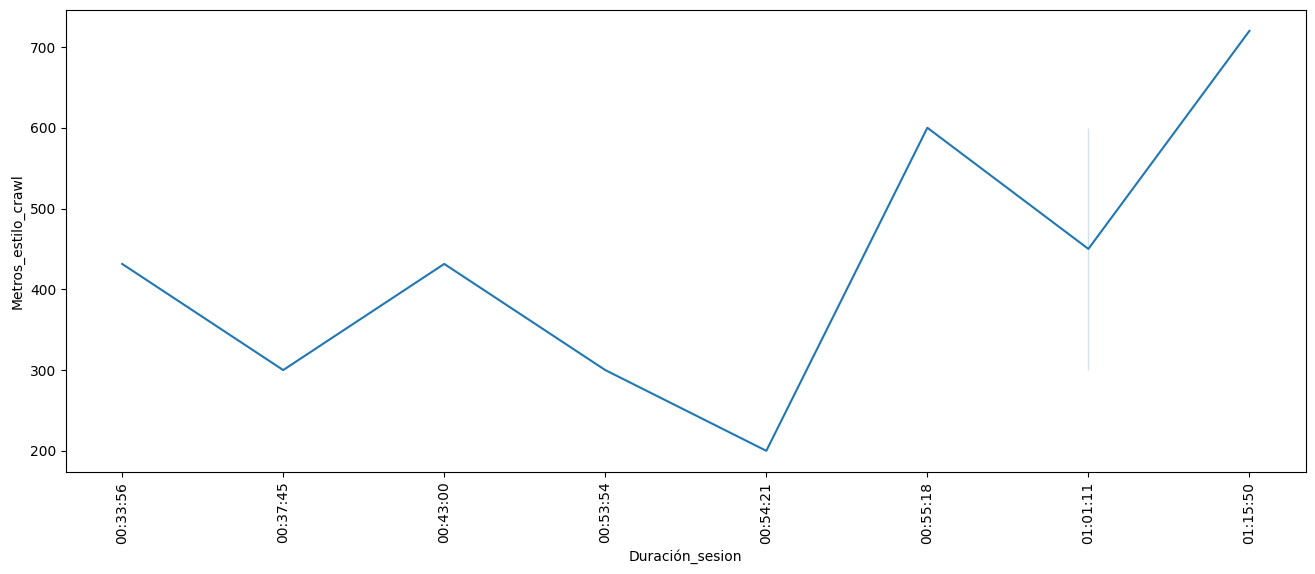

In [190]:
plt.figure(figsize=(16,6))

df = df.sort_values("Duración_sesion", ascending=True)
sns.lineplot(x="Duración_sesion", y="Metros_estilo_crawl", data=df)
plt.xticks(rotation=90)
plt.show()

In [120]:
df.sample(3)

,Hora_inicio,Hora_de_finalización,Duración_sesion,Tipo_entrenamiento,Objetivos,Metas,Metros_piscina,Metros_totales,Cantidad_de_brazadas,Frecuencia_cardíaca,...,Repeticiones_estilo_crawl,Descanso_entre_series,Ritmo_promedio,Vueltas,Tiempo_ingesta_previa,Ingesta_descripcion,Suplemento_dietario,Ejercicios_previos,Tiempo_ejercicios_previos,Sensaciones_entrenamiento
Fecha,,,,,,,,,,,,,,,,,,,,,
2023-01-23,21:06:00,00:00:00,00:37:45,Series,Mejorar Tecnica,Aumentar distancia,20,780,506,134,...,2.0,00:01:30,4.50,39,01:00:00,"Cafe, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-20,09:33:00,00:00:00,00:53:54,Series,Mejorar Tecnica,Incrementar velocidad,20,1100,663,137,...,2.0,00:01:30,4.54,55,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
2023-01-25,08:50:00,09:50:00,01:01:11,Estilos,Mejorar Tecnica,Mejorar crawl,20,1340,818,131,...,3.0,00:01:00,4.34,67,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas


In [121]:
list(df.columns)

['Hora_inicio',
 'Hora_de_finalización',
 'Duración_sesion',
 'Tipo_entrenamiento',
 'Objetivos',
 'Metas',
 'Metros_piscina',
 'Metros_totales',
 'Cantidad_de_brazadas',
 'Frecuencia_cardíaca',
 'Calorías_quemadas',
 'Tiempo_estilo_espalda',
 'Metros_estilo_espalda',
 'Repeticiones_estilo_espalda',
 'Tiempo_estilo_pecho',
 'Metros_estilo_pecho',
 'Repeticiones_estilo_pecho',
 'Tiempo_estilo_crawl',
 'Metros_estilo_crawl',
 'Repeticiones_estilo_crawl',
 'Descanso_entre_series',
 'Ritmo_promedio',
 'Vueltas',
 'Tiempo_ingesta_previa',
 'Ingesta_descripcion',
 'Suplemento_dietario',
 'Ejercicios_previos',
 'Tiempo_ejercicios_previos',
 'Sensaciones_entrenamiento']

Text(0, 0.5, 'Metros')

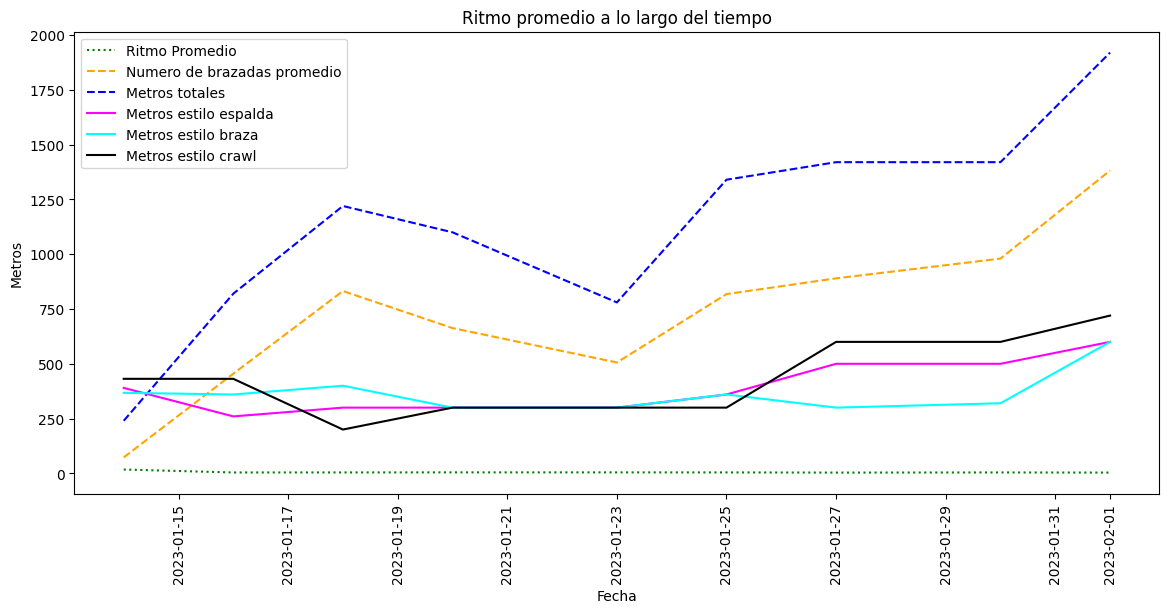

In [192]:
# Tamaño del grafico
plt.figure(figsize=(14,6))

# Titulo del grafico
plt.title("Ritmo promedio a lo largo del tiempo")

# Variable Ritmo promedio
sns.lineplot(data=df['Ritmo_promedio'], label="Ritmo Promedio", linestyle=":", color="green")

# Variable Cantidad de brazadas
sns.lineplot(data=df['Cantidad_de_brazadas'], label="Numero de brazadas promedio", linestyle="--", color="orange")

# Variable Metrso totales
sns.lineplot(data=df['Metros_totales'], label="Metros totales", linestyle="--", color="blue")

# Variables Metros estilos
sns.lineplot(data=df['Metros_estilo_espalda'], label="Metros estilo espalda", linestyle="-", color="magenta" )
sns.lineplot(data=df['Metros_estilo_pecho'], label="Metros estilo braza", linestyle="-", color="cyan")
sns.lineplot(data=df['Metros_estilo_crawl'], label="Metros estilo crawl", linestyle="-", color="black")

plt.xticks(rotation=90)

# Etiqueta eje x
plt.xlabel("Fecha")
plt.ylabel("Metros")

Text(0.5, 0, 'Cantidad de brazadas')

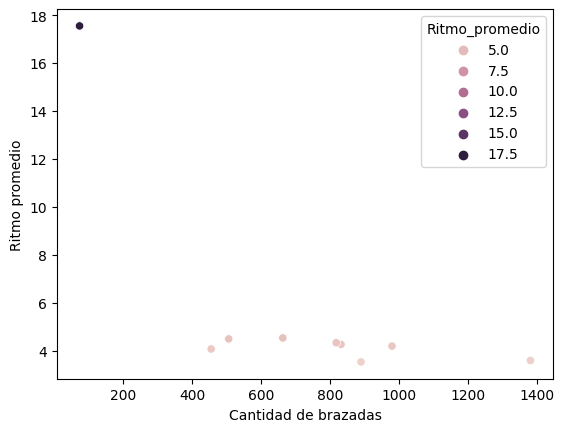

In [193]:
sns.scatterplot(y=df['Ritmo_promedio'], x=df['Cantidad_de_brazadas'], hue=df['Ritmo_promedio'])
# Etiqueta eje x
plt.ylabel("Ritmo promedio")
plt.xlabel("Cantidad de brazadas")

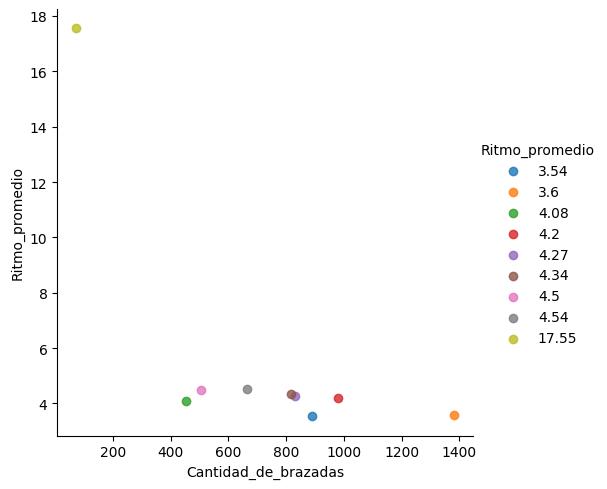

In [194]:
sns.lmplot(x="Cantidad_de_brazadas", y="Ritmo_promedio", hue="Ritmo_promedio", data=df)

/tmp/ipykernel_81/3635632072.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=df['Tipo_entrenamiento'],


<AxesSubplot: xlabel='Tipo_entrenamiento', ylabel='Metros_totales'>

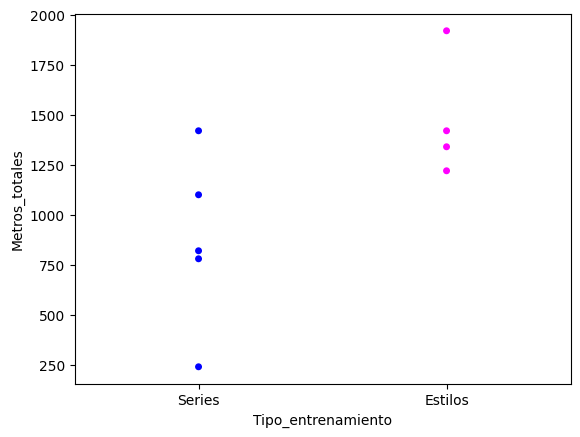

In [195]:
sns.swarmplot(x=df['Tipo_entrenamiento'],
              y=df['Metros_totales'],
              palette=["blue", "magenta"])